# Scalar data visualization in two dimensions

For data in two dimensions it is common to associate the dimensions of the data to the dimension on a screen (or display).


Some options for scalar visualization are:

- Image;
- Deformed surface; and
- Isocontours.

In general, I would suggest Matplotlib over Mayavi for 2D visualizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mayavi import mlab

In [2]:
%matplotlib notebook
mlab.init_notebook()
plt.style.use("../img/matplotlib.mplstyle")

Notebook initialized with x3d backend.


In [3]:
## Test data: Matlab `peaks()`
def peaks(xmin=-3, xmax=3, ymin=-3, ymax=3, nx=100, ny=100):
    x, y = np.mgrid[-3:3:50j,-3:3:50j]
    z =  3*(1 - x)**2 * np.exp(-x**2 - (y + 1)**2) \
       - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 - y**2) \
       - 1./3*np.exp(-(x + 1)**2 - y**2)
    return x, y, z

In [4]:
x, y, z = peaks()

## Questions:

1. Considering the range of values, what would be an appropriate colormap for this dataset?
2. What representation better suits the data?

## Image representation

There are several option to pick for this representation, although, they are not completely equivalent.

They are:

- ``imshow``: The origin is in the top left corner. Does not allow to pass arrays extra arrays for coordinates.
- ``pcolor``: The origin is in the bottom left corner. Does not allow to pass arrays extra arrays for coordinates.
- ``pcolormesh``. The origin is in the bottom left corner. Does not allow to pass arrays extra arrays for coordinates. The main difference is speed.

When in doubt, use ``pcolormesh``.



<IPython.core.display.Javascript object>


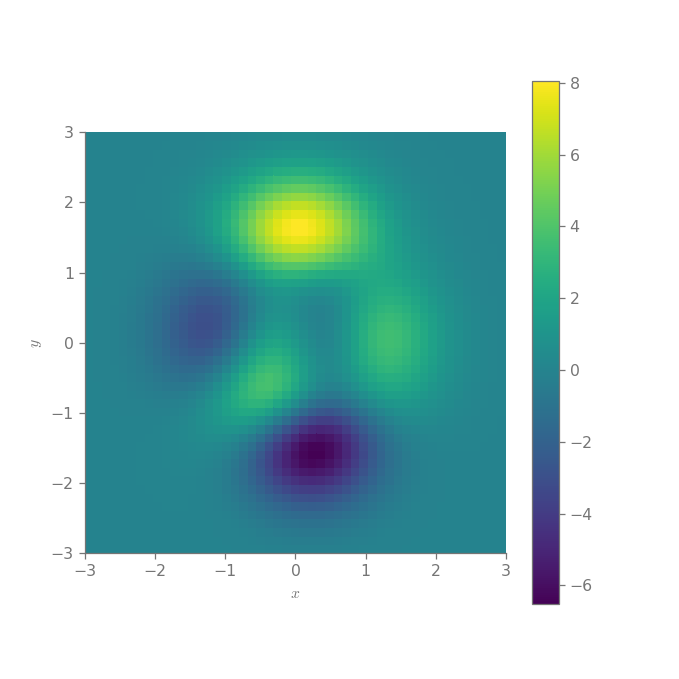

In [5]:
plt.figure(figsize=(6, 6))
plt.pcolormesh(x, y, z)
plt.colorbar()
plt.axis("image")
plt.xlabel("$x$")
plt.ylabel("$y$");

## Deformed surface

Matplotlib offers a 3D projection option for axes creation. This allows to create 3D scenes,
as the ones required for deformed surfaces. It does not work as neat as in proper 2D visualizations,
but it is okay, if we don't need transparency, or several surfaces in the scene.

<IPython.core.display.Javascript object>


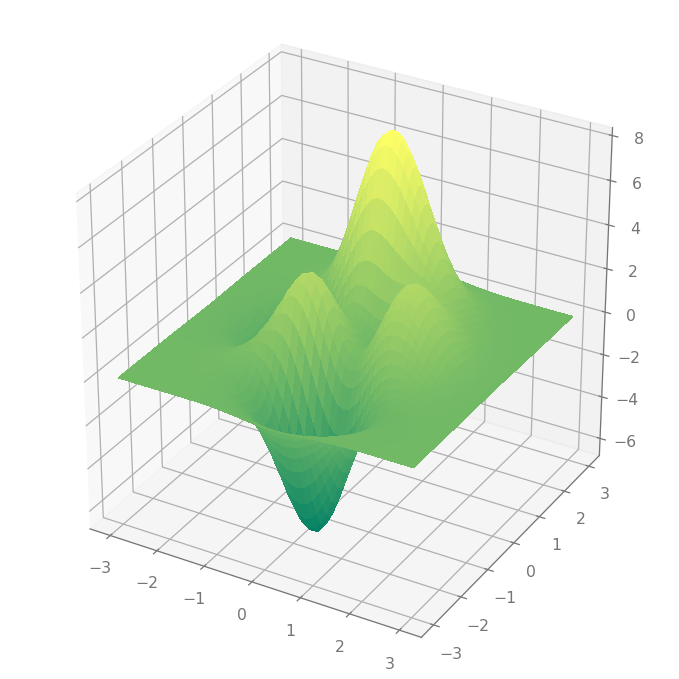

In [6]:
# Using matplotlib
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, cmap="summer")

In [7]:
# Using mayavi
mlab.surf(x, y, z, warp_scale='auto')

## Isocontours


There are two options of contours in Matplotlib:

- ``contour``: Create the lines of constant value (isolines).
- ``contourf``: Fill the space between the isolines with color.

<IPython.core.display.Javascript object>


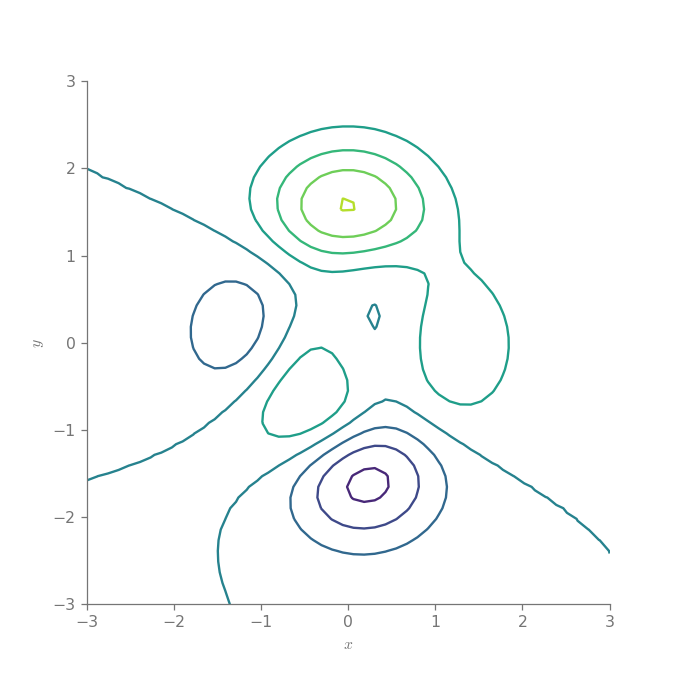

In [8]:
# Contours
plt.figure(figsize=(6, 6))
plt.contour(x, y, z)
plt.axis("image")
plt.xlabel("$x$")
plt.ylabel("$y$");

<IPython.core.display.Javascript object>


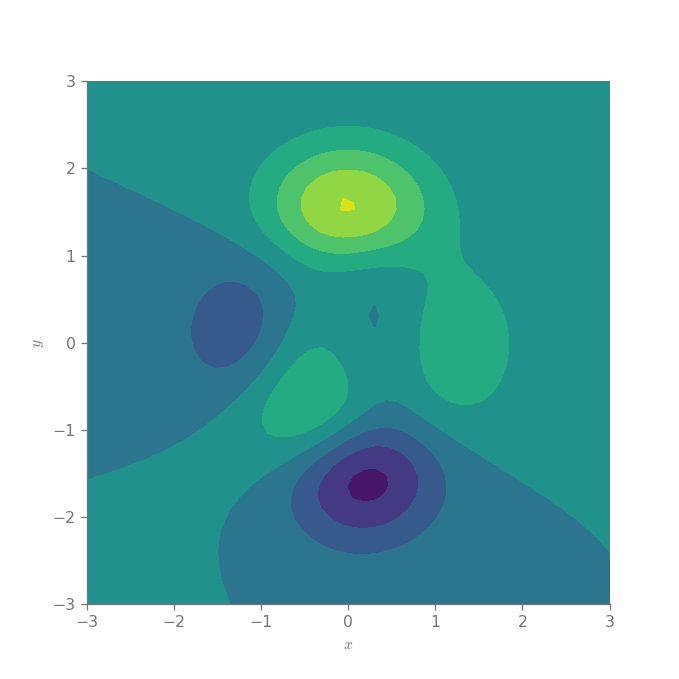

In [9]:
# Filled contours
plt.figure(figsize=(6, 6))
plt.contourf(x, y, z)
plt.axis("image")
plt.xlabel("$x$")
plt.ylabel("$y$");

We can also combine deformed surface visualization with isocontours.

<IPython.core.display.Javascript object>


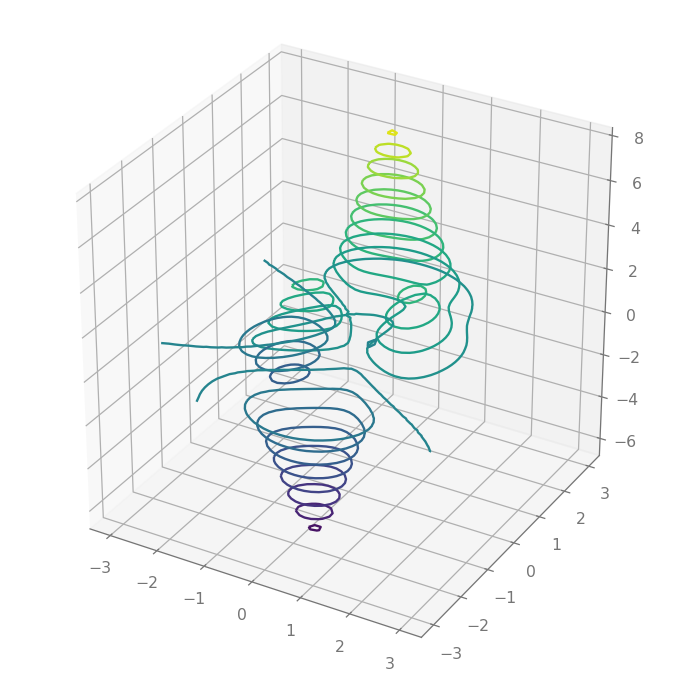

In [10]:
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
ax.contour(x, y, z, 20);

<IPython.core.display.Javascript object>


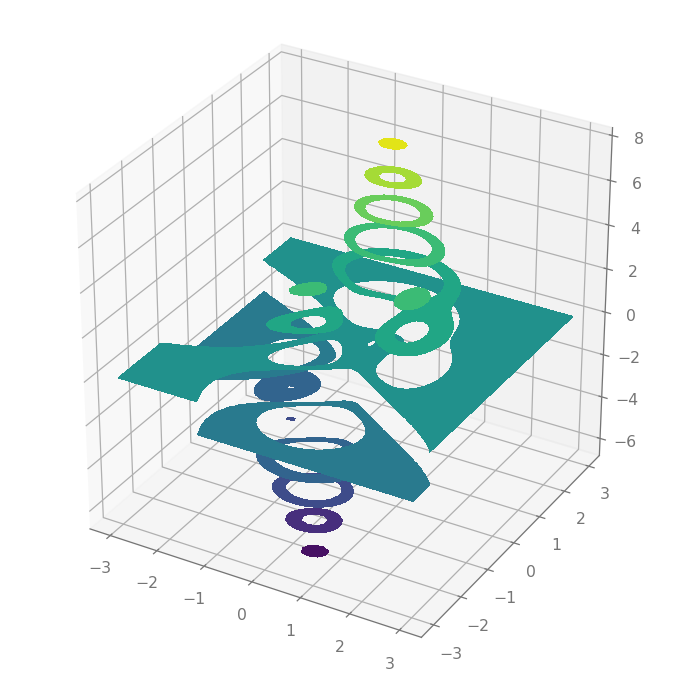

In [11]:
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
ax.contourf(x, y, z, 10);

## Exercise

Visualize the data contained in the file `../data/2d_exercise.npy`. You can load it using

    data = np.load("../data/2d_exercise.npy")
    
Uncomment the following line to see the solution to the exercise.

In [12]:
# %load ./snippets/2d_scalar_vis.py


In [13]:
# This cell stylize the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open('./custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()